##### Î∞±ÏóîÎìú ÏΩîÎìú

In [1]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
data = pd.read_csv('raw_data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_93973/4287711130.py:4: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw_data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


In [2]:
### Îç∞Ïù¥ÌÑ∞ ÌååÏïÖ

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ mixed Ïù∏ Ïª¨Îüº : [1, 2, 7, 11, 29] Î≤à Ïß∏ Ïª¨Îüº
columns = data.columns # Ï†ÑÏ≤¥ Ïª¨Îüº
for column in columns:
    print(data[column].apply(type).value_counts())

# mixed Îç∞Ïù¥ÌÑ∞ Î™ÖÎ™Ö 
mixed_columns_index = [1, 2, 7, 11, 29]
mixed_columns_name = data.columns[mixed_columns_index]

# Major Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
for column in mixed_columns_name:
    print(data[column].apply(type).unique())
    print(data[column].apply(type).value_counts())

# Minor Îç∞Ïù¥ÌÑ∞ Ï†ïÏ≤¥ ÌôïÏù∏ 
## 1, 'Health Service Area', 'Hospital County', 'Patient Disposition' -> Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌïÑÏöî
## 2. 'Zip Code - 3 digits' -> ÌôòÏûê Í±∞Ï£ºÏßÄÏó≠ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ -> Drop 
for column in mixed_columns_name:
    not_str_index = data[column].apply(lambda x: type(x) == str)
    print(data[column][~not_str_index].value_counts(dropna=False))


index
<class 'int'>    2622133
Name: count, dtype: int64
Health Service Area
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Hospital County
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Operating Certificate Number
<class 'float'>    2622133
Name: count, dtype: int64
Facility ID
<class 'float'>    2622133
Name: count, dtype: int64
Facility Name
<class 'str'>    2622133
Name: count, dtype: int64
Age Group
<class 'str'>    2622133
Name: count, dtype: int64
Zip Code - 3 digits
<class 'str'>      2061890
<class 'int'>       524288
<class 'float'>      35955
Name: count, dtype: int64
Gender
<class 'str'>    2622133
Name: count, dtype: int64
Race
<class 'str'>    2622133
Name: count, dtype: int64
Ethnicity
<class 'str'>    2622133
Name: count, dtype: int64
Length of Stay
<class 'str'>    2523136
<class 'int'>      98997
Name: count, dtype: int64
Type of Admission
<class 'str'>    2622133
Name: count, dtype: int64
Patient Disp

In [3]:
##########################################
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Í≤∞Ï∏°Ïπò Î∞è ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞í Ï≤òÎ¶¨
##########################################

pd.set_option('display.max_columns', None)

# 'Length of Stay' Ïª¨Îüº Ï≤òÎ¶¨
## Î¨∏ÏûêÏó¥ Îì± ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞íÏùÄ NaNÏúºÎ°ú Î≥ÄÌôò
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')
## NaNÏù¥ Îêú ÌñâÏùÄ Ï†úÍ±∞
df = data.dropna(subset=['Length of Stay'])
## float ‚Üí int Î°ú ÌòïÎ≥ÄÌôò (NaN Ï†úÍ±∞ÎêòÏóàÏúºÎØÄÎ°ú ÏïàÏ†Ñ)
df['Length of Stay'] = df['Length of Stay'].astype(int)

# NaN Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏùÄ Ïª¨Îüº Ï†úÍ±∞
## Source of Payment 2, Source of Payment 3, Operating Provider License Number, Other Provider License Number Ïª¨Îüº
nan_columns = df.columns[df.isna().sum() > 10_000]
df = df.drop(columns=nan_columns)

# ÏùòÎØ∏ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞ 
# 'Zip Code - 3 digits'(Ïö∞Ìé∏Î≤àÌò∏) / 'index'(Ïù∏Îç±Ïä§)
# 'Attending Provider License Number'(Ï£ºÏπòÏùò Î©¥ÌóàÎ≤àÌò∏) / 'Operating Certificate Number'(Ïö¥ÏòÅ Ïù∏Ï¶ù Î≤àÌò∏)
df = df.drop(columns=['Zip Code - 3 digits', 'index', 'Attending Provider License Number', 'Operating Certificate Number'])


# Weight(Î™∏Î¨¥Í≤å) Í∞íÏù¥ 0Ïù¥ Í≥ºÎèÑÌïòÍ≤å ÎßéÏïÑ ÏùòÎØ∏ ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
# 'Birth Weight' Ïª¨Îüº ÏÇ≠Ï†ú
df = df.drop(columns=['Birth Weight'])

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_93973/480995945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


In [4]:
### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ 
from utils.cate_outlier import preview_rare_categories, replace_rare_categories
from utils.num_outlier import plot_zscore_outliers_all, remove_zscore_outliers_all
import pandas as pd

num_columns = ['Total Charges', 'Total Costs', 'Length of Stay']
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']] # target = 'Patient Disposition'

## Î≤îÏ£ºÌòï Ïù¥ÏÉÅÏπò ÌôïÏù∏
preview_rare_categories(df, columns=cate_columns, threshold=0.01)

'Health Service Area' Ïª¨ÎüºÏóêÎäî Ìù¨Í∑Ä Î≤îÏ£º ÏóÜÏùå
'Hospital County' Ïª¨ÎüºÏóêÏÑú Ìù¨Í∑Ä Î≤îÏ£º Î∞úÍ≤¨ (40Í∞ú): ['Schenectady', 'Niagara', 'Chemung', 'Warren', 'Rensselaer', 'Otsego', 'Ulster', 'St Lawrence', 'Chautauqua', 'Ontario', 'Jefferson', 'Clinton', 'Saratoga', 'Steuben', 'Putnam', 'Cattaraugus', 'Montgomery', 'Oswego', 'Tompkins', 'Franklin', 'Columbia', 'Sullivan', 'Cayuga', 'Madison', 'Genesee', 'Cortland', 'Wayne', 'Fulton', 'Wyoming', 'Livingston', 'Orleans', 'Allegany', 'Chenango', 'Lewis', 'Delaware', 'Schuyler', 'Herkimer', 'Yates', 'Essex', 'Schoharie']
'Facility ID' Ïª¨ÎüºÏóêÏÑú Ìù¨Í∑Ä Î≤îÏ£º Î∞úÍ≤¨ (200Í∞ú): [5.0, 1172.0, 1301.0, 1453.0, 630.0, 1139.0, 1178.0, 636.0, 527.0, 528.0, 181.0, 1176.0, 1165.0, 213.0, 635.0, 1469.0, 3067.0, 1286.0, 924.0, 1318.0, 1628.0, 409.0, 599.0, 1638.0, 1294.0, 207.0, 913.0, 563.0, 1320.0, 1288.0, 1005.0, 1633.0, 1302.0, 1168.0, 1738.0, 1692.0, 471.0, 779.0, 1045.0, 885.0, 776.0, 829.0, 686.0, 943.0, 218.0, 208.0, 1454.0, 3975.0, 

'Total Charges' Ïª¨Îüº Ïù¥ÏÉÅÏπò Ïàò (|Z| > 2): 75301Í∞ú
'Total Costs' Ïª¨Îüº Ïù¥ÏÉÅÏπò Ïàò (|Z| > 2): 65946Í∞ú
'Length of Stay' Ïª¨Îüº Ïù¥ÏÉÅÏπò Ïàò (|Z| > 2): 94499Í∞ú


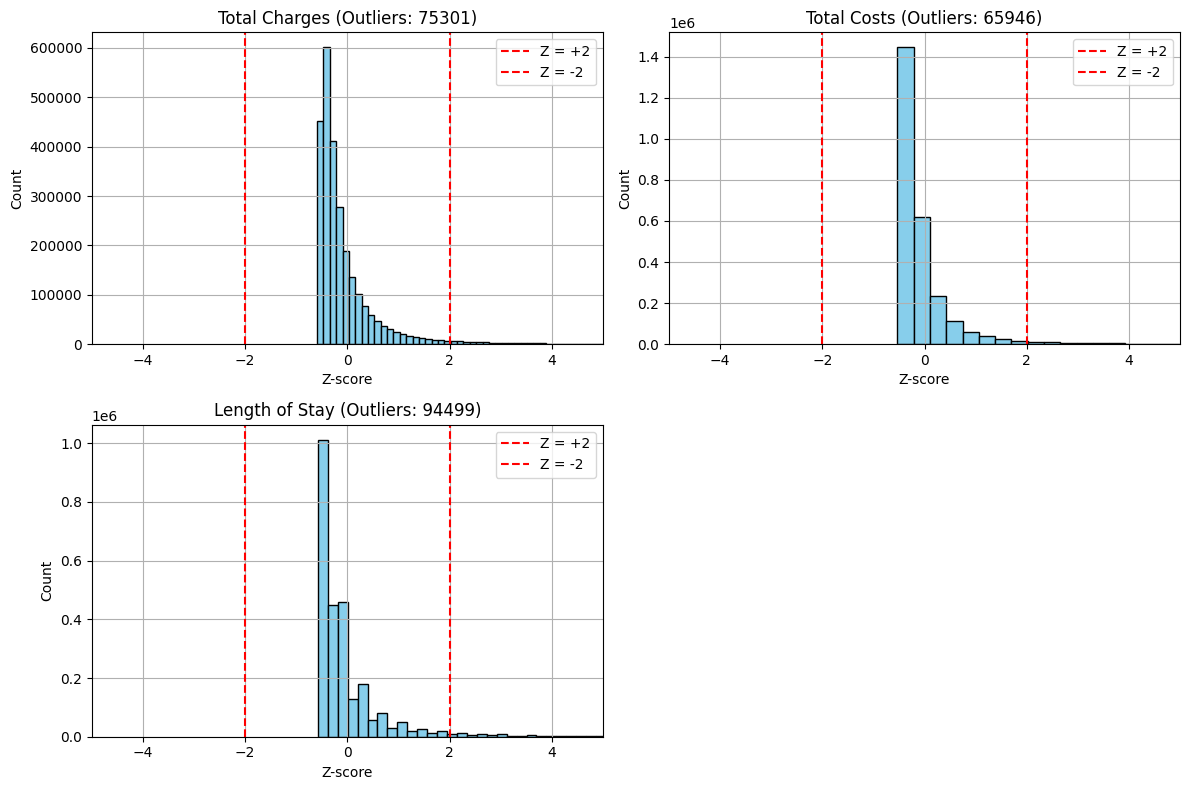

In [5]:
## 1) ÏàòÏπòÌòï Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
bins = [1000, 1000, 80]
plot_zscore_outliers_all(df, columns=num_columns, bins_list=bins, z_thresh=2)

In [6]:
# Ïù¥ÏÉÅÏπò ÎåÄÏ≤¥ Î∞è ÏÇ≠Ï†ú

# 1Îã®Í≥Ñ: Î≤îÏ£ºÌòï Ïª¨ÎüºÏùò Ìù¨Í∑ÄÍ∞íÏùÑ 'Others'Î°ú ÎåÄÏ≤¥
df_replaced = replace_rare_categories(df, columns=cate_columns, threshold=0.001)

# 2Îã®Í≥Ñ: ÏàòÏπòÌòï Ïª¨ÎüºÏùò Z-score Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞
df_cleaned = remove_zscore_outliers_all(df_replaced, columns=num_columns, z_thresh=2)

df_cleaned.shape

(2481639, 29)

In [7]:
df = df_cleaned

In [10]:
### Î™®Îç∏ ÏÑ†Ï†ï 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# -------------------------------
# ÎåÄÎûµÏ†ÅÏù∏ Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê
# -------------------------------

# -------------------------------
# Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
# -------------------------------
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Tree based Î™®Îç∏(DecisionTree, RandomForest, XGBoost Îì±) + Support Vector Î™®Îç∏ 
cat_pipeline = make_pipeline( 
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - ÎπÑ Tree based Î™®Îç∏(LogisticRegression Îì±)
cat2_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
# Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)
# ÌååÏù¥ÌîÑÎùºÏù∏ - Tree based Î™®Îç∏(DecisionTree, RandomForest, XGBoost Îì±) + Support Vector Î™®Îç∏ 
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])
# ÌååÏù¥ÌîÑÎùºÏù∏ - ÎπÑ Tree based Î™®Îç∏(LogisticRegression Îì±)
preprocessor2 = ColumnTransformer([
    ('cat', cat2_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])
# PCA - SVC Î™®Îç∏ÏóêÎßå Ï†ÅÏö©
pca = PCA(n_components=3)
# SMOTE - Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Í∏∞Î≤ï
smote = SMOTE(k_neighbors=4, sampling_strategy=0.1, random_state=42)
# -------------------------------
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# -------------------------------

# Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ°ú Î≥ÄÌôò 
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'].values == 'Left Against Medical Advice', 1, 0)

# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ 1%, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 0.2%
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.01, test_size=0.002, random_state=42, stratify=y)


# -------------------------------
# ÏÇ¨Ïö©Ìï† ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
# -------------------------------
models = {
    'LogisticRegression' : LogisticRegression(),
    'KNNNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    # 'Support Vector Classifier': SVC(probability=True)
}

# -------------------------------
# Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÎπÑÍµê
# -------------------------------
results = []
print("="*20, "Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê", "="*20)
for name, model in models.items():

    # Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏
    if name in ['KNNNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']:
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('model', model)
        ])
    # SVC Î™®Îç∏ - PCA Ï†ÅÏö©
    elif name == 'Support Vector Classifier':
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('pca', pca),
        ('model', model)
        ])
    # LogisticRegression Î™®Îç∏ - OneHotEncoding Ï†ÅÏö©
    else:
        pipeline = Pipeline([
        ('preprocessor', preprocessor2),
        ('smote', smote),
        ('model', model)
        ])

    # Î™®Îç∏ ÌïôÏäµ
    pipeline.fit(X_train, y_train)
    # Î™®Îç∏ ÏòàÏ∏°
    y_pred_proba = pipeline.predict_proba(X_test)
    # Threshold : 0.5
    y_pred = np.where(y_pred_proba[:, 1] > 0.5, 1, 0)

    # ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

==================== Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ====================
[LogisticRegression] Accuracy: 0.9710, Precision: 0.3824, Recall: 0.4643, F1 Score: 0.4194
[KNNNeighbors] Accuracy: 0.9531, Precision: 0.1990, Recall: 0.3571, F1 Score: 0.2556
[Decision Tree] Accuracy: 0.9676, Precision: 0.3212, Recall: 0.3929, F1 Score: 0.3534
[Random Forest] Accuracy: 0.9841, Precision: 0.9459, Recall: 0.3125, F1 Score: 0.4698
[Gradient Boosting] Accuracy: 0.9845, Precision: 1.0000, Recall: 0.3125, F1 Score: 0.4762
[XGBoost] Accuracy: 0.9833, Precision: 0.8222, Recall: 0.3304, F1 Score: 0.4713


In [12]:
print(df['Type of Admission'].value_counts(dropna=False))


# Ïù¥ÌÉà Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ± (1 = Ïù¥ÌÉà, 0 = Ï†ïÏÉÅÌá¥Ïõê)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)


Type of Admission
Emergency        1538771
Elective          486663
Newborn           235349
Urgent            216399
Not Available       3665
Others               792
Name: count, dtype: int64


In [13]:
# Í∞Å Type of AdmissionÎ≥Ñ Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
admission_evasion = df.groupby('Type of Admission')['y'].mean().sort_values(ascending=False)

print(admission_evasion)


Type of Admission
Others           0.031566
Emergency        0.030216
Elective         0.014406
Urgent           0.011899
Not Available    0.008731
Newborn          0.000153
Name: y, dtype: float64


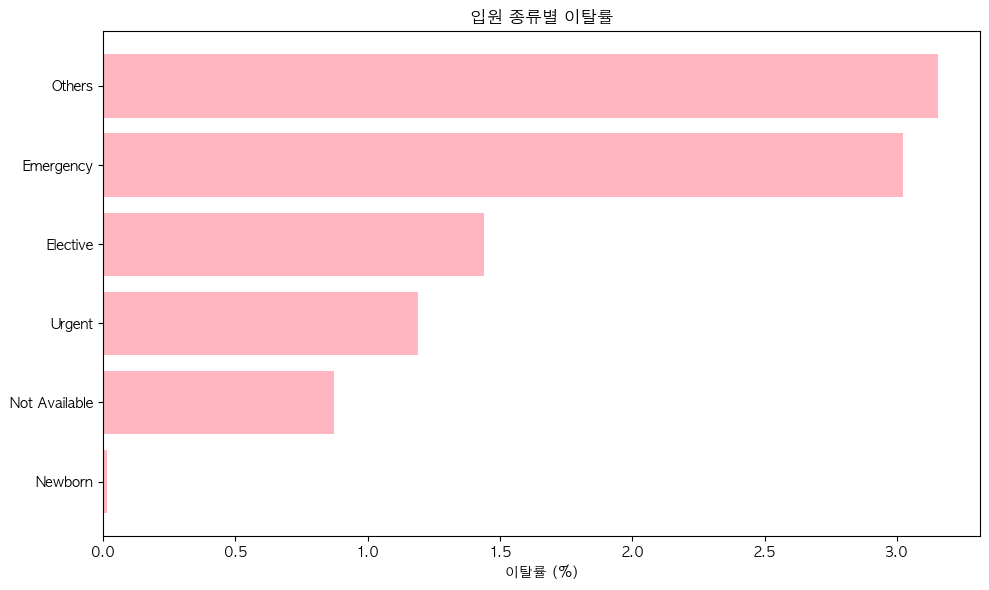

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(admission_evasion.index, admission_evasion.values * 100, color='Lightpink')
plt.xlabel('Ïù¥ÌÉàÎ•† (%)')
plt.title('ÏûÖÏõê Ï¢ÖÎ•òÎ≥Ñ Ïù¥ÌÉàÎ•†')
plt.gca().invert_yaxis()

# ÎßâÎåÄÏóê ÏàòÏπò ÌëúÏãú
# for bar in bars:
#     plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
#              f'{bar.get_width():.1f}%', va='center')

plt.tight_layout()
plt.show()


Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùÄ Ïù¥Ïú†
Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ï¥ù 240Îßå Í±¥ Ïù¥ÏÉÅÏùò ÏûÖÏõê Í∏∞Î°ù Ï§ë, ÏûêÍ∞Ä Ìá¥Ïõê(LAMA) ÏÇ¨Î°ÄÎäî ÏïΩ 56,000Í±¥ÏúºÎ°ú ÏïΩ 2.3% ÏàòÏ§ÄÏûÖÎãàÎã§.

Î≥ëÏõêÏóêÏÑúÏùò ÏûêÏùò Ìá¥ÏõêÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏòàÏô∏Ï†ÅÏù∏ ÏÉÅÌô©Ïù¥Î©∞, ÌäπÌûà Ï§ëÏ¶ùÎèÑ ÎÜíÍ≥† ÏùëÍ∏âÎèÑÍ∞Ä ÎÜíÏùÄ Í≤ΩÏö∞ÏóêÎäî ÌôòÏûêÍ∞Ä ÏùòÎ£åÏßÑÏùò Í∂åÍ≥† ÏóÜÏù¥ Ïù¥ÌÉàÌïòÍ∏∞ Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

üì¢ "Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùÄ Í≤ÉÏùÄ ÏùòÎ£å Í∏∞Í¥ÄÏùò Ï°∞Í∏∞ Í∞úÏûÖ, Î≥¥Ìò∏Ïûê ÎèôÏùò, ÏùëÍ∏âÏã§ Î∞è Ï§ëÌôòÏûêÍ¥ÄÎ¶¨ Ï≤¥Í≥Ñ Îì± Î≥µÌï©Ï†ÅÏù∏ ÏöîÏù∏Ïù¥ ÏûëÏö©Ìïú Í≤∞Í≥ºÎ°ú Î≥º Ïàò ÏûàÏäµÎãàÎã§."



üîç ÏûÖÏõêÏú†ÌòïÎ≥Ñ ÏûêÏùò Ìá¥Ïõê Ïù¥ÌÉàÎ•† Î∂ÑÏÑù
Î∂ÑÏÑù Í≤∞Í≥º, Ï†ÑÏ≤¥ ÌèâÍ∑† Ïù¥ÌÉàÎ•†ÏùÄ ÏïΩ 2.3%Î°ú ÎÇÆÏùÄ Ìé∏Ïù¥Î©∞, ÏûÖÏõê Ïú†ÌòïÎ≥ÑÎ°úÎäî Others, Emergency ÏûÖÏõê Ïú†ÌòïÏóêÏÑú ÏûêÏùò Ìá¥Ïõê ÎπÑÏú®Ïù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
ÌäπÌûà Others Ïú†ÌòïÏùò Í≤ΩÏö∞, ÌëúÏ§Ä ÏΩîÎìúÌôîÎêòÏßÄ ÏïäÏùÄ ÏûÖÏõêÍ≤ΩÎ°ú(Ïô∏Î∂Ä Ï†ÑÏõê, Î≥¥Ìò∏Ïûê ÏöîÏ≤≠ Îì±)Í∞Ä Ìè¨Ìï®Îèº Î≥ëÏõê Í¥ÄÎ¶¨Ïùò ÏÇ¨Í∞ÅÏßÄÎåÄÏùº Ïàò ÏûàÏúºÎ©∞, Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎπÑÍµêÏ†Å ÎÜíÏäµÎãàÎã§.
Î∞òÎ©¥ Newborn Ïú†ÌòïÏùÄ Ïã†ÏÉùÏïÑ ÏûÖÏõêÏù¥ÎØÄÎ°ú ÏûêÏùò Ìá¥ÏõêÏù¥ ÏÇ¨Ïã§ÏÉÅ Î∂àÍ∞ÄÎä•ÌïòÎã§Îäî Ï†êÏóêÏÑú Í∞ÄÏû• ÎÇÆÏùÄ Ïù¥ÌÉàÎ•†ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.

| ÏûÖÏõêÏú†Ìòï          | Ïù¥ÌÉàÎ•† (%)  | Ìï¥ÏÑù ÏöîÏïΩ                                                             |
| ------------- | -------- | ----------------------------------------------------------------- |
| Others        | **3.16** | ÏΩîÎìúÌôîÎêòÏßÄ ÏïäÏùÄ ÏûÖÏõê Ïú†Ìòï, Ïô∏Î∂ÄÏóêÏÑú Ï†ÑÏõêÎêú ÌôòÏûê Îì±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ **Í¥ÄÎ¶¨ ÏÇ¨Í∞ÅÏßÄÎåÄÏóê ÏûàÏùÑ Í∞ÄÎä•ÏÑ±**           |
| Emergency     | 3.02     | ÏùëÍ∏â ÏÉÅÌô©ÏóêÏÑú ÏûÖÏõêÌïú ÌôòÏûê Ï§ë **ÎßåÏ°±Ïä§ÎüΩÏßÄ Î™ªÌïú ÏùëÍ∏â ÎåÄÏùë** ÎòêÎäî **ÏùòÎ£åÏßÑÍ≥ºÏùò Í∞àÎì±** Îì±ÏúºÎ°ú Ïù∏Ìï¥ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± |
| Elective      | 1.44     | ÏÑ†ÌÉùÏ†Å ÏûÖÏõêÏúºÎ°ú ÏπòÎ£åÏóê ÎåÄÌïú Í≥ÑÌöçÏÑ±Ïù¥ ÎÜíÍ≥† **ÏûêÍ∞Ä Ìá¥Ïõê Í∞ÄÎä•ÏÑ± ÎÇÆÏùå**                          |
| Urgent        | 1.19     | Ï§ÄÏùëÍ∏â ÏÉÅÌô©ÏúºÎ°ú ÏùºÎ∂Ä Î∂àÎßåÏ°± ÌôòÏûê Ï°¥Ïû¨ Í∞ÄÎä•ÏÑ±                                         |
| Not Available | 0.87     | Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ, ÎπÑÏ†ïÏÉÅ ÏàòÏßë Îì±Ïùò Í∞ÄÎä•ÏÑ±                                             |
| Newborn       | **0.01** | Ïã†ÏÉùÏïÑÏùò Í≤ΩÏö∞ Î≥¥Ìò∏Ïûê Ï±ÖÏûÑ ÌïòÏóê ÏûÖÌá¥ÏõêÏù¥ Í≤∞Ï†ïÎêòÎØÄÎ°ú **ÏûêÏùò Ìá¥Ïõê ÏÇ¨Ïã§ÏÉÅ Î∂àÍ∞ÄÎä•**                    |


In [14]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∏∞Ï§Ä
print("üí∞ Total Charges:")
print(df_cleaned['Total Charges'].describe())

print("\nüí∏ Total Costs:")
print(df_cleaned['Total Costs'].describe())


üí∞ Total Charges:
count    2.481639e+06
mean     2.165156e+04
std      2.082174e+04
min      1.000000e-02
25%      7.571945e+03
50%      1.463323e+04
75%      2.799064e+04
max      1.265599e+05
Name: Total Charges, dtype: float64

üí∏ Total Costs:
count    2.481639e+06
mean     8.413465e+03
std      7.929400e+03
min      0.000000e+00
25%      3.157285e+03
50%      5.801610e+03
75%      1.076115e+04
max      5.534683e+04
Name: Total Costs, dtype: float64


In [15]:
# Ïù¥ÌÉà ÌôòÏûêÏôÄ ÎπÑÏù¥ÌÉà ÌôòÏûêÏùò ÎπÑÏö© Î∂ÑÌè¨ ÎπÑÍµê
print("Ïù¥ÌÉà ÌôòÏûêÏùò Total Charges")
print(df_cleaned[df_cleaned['y'] == 1]['Total Charges'].describe())

print("\nÎπÑÏù¥ÌÉà ÌôòÏûêÏùò Total Charges")
print(df_cleaned[df_cleaned['y'] == 0]['Total Charges'].describe())



Ïù¥ÌÉà ÌôòÏûêÏùò Total Charges
count     56174.000000
mean      11594.626344
std       12401.862029
min         340.000000
25%        4571.895000
50%        7641.650000
75%       13425.575000
max      125400.000000
Name: Total Charges, dtype: float64

ÎπÑÏù¥ÌÉà ÌôòÏûêÏùò Total Charges
count    2.425465e+06
mean     2.188448e+04
std      2.091954e+04
min      1.000000e-02
25%      7.709640e+03
50%      1.486208e+04
75%      2.833406e+04
max      1.265599e+05
Name: Total Charges, dtype: float64


In [16]:
print("\nÏù¥ÌÉà ÌôòÏûêÏùò Total Costs")
print(df_cleaned[df_cleaned['y'] == 1]['Total Costs'].describe())

print("\nÎπÑÏù¥ÌÉà ÌôòÏûêÏùò Total Costs")
print(df_cleaned[df_cleaned['y'] == 0]['Total Costs'].describe())


Ïù¥ÌÉà ÌôòÏûêÏùò Total Costs
count    56174.000000
mean      4786.135567
std       5426.997199
min        147.520000
25%       1881.780000
50%       3044.725000
75%       5333.177500
max      55216.520000
Name: Total Costs, dtype: float64

ÎπÑÏù¥ÌÉà ÌôòÏûêÏùò Total Costs
count    2.425465e+06
mean     8.497474e+03
std      7.958498e+03
min      0.000000e+00
25%      3.218590e+03
50%      5.883150e+03
75%      1.088074e+04
max      5.534683e+04
Name: Total Costs, dtype: float64


In [17]:
import pandas as pd

# 1. ÏÇ¨Ï†Ñ ÏÑ∏ÌåÖ (Ïù¥ÌÉà Ïó¨Î∂Ä ÎùºÎ≤®ÎßÅÏù¥ ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
# df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# 2. ÏÇ¨Ïö©Ìï† Ïª¨Îüº
columns = ['Total Costs', 'Total Charges']
bin_count = 6  # ÏõêÌïòÎäî Íµ¨Í∞Ñ Ïàò

# 3. Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
evasion_by_price_bin = {}

# 4. Í∞Å Ïª¨ÎüºÎ≥Ñ Íµ¨Í∞Ñ ÎÇòÎàÑÍ≥† Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
for col in columns:
    # Íµ¨Í∞Ñ ÏÉùÏÑ±: Î∂ÑÏúÑÏàò Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎàî
    df[f'{col}_bin'] = pd.qcut(df[col], q=bin_count, duplicates='drop')

    # Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
    evasion_rate = df.groupby(f'{col}_bin')['y'].mean() * 100  # Î∞±Î∂ÑÏú®Î°ú
    evasion_by_price_bin[col] = evasion_rate

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"\nüíµ [{col}] Í∞ÄÍ≤© Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† (%)")
    print(evasion_rate.round(2))


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_93973/2812369076.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasion_rate = df.groupby(f'{col}_bin')['y'].mean() * 100  # Î∞±Î∂ÑÏú®Î°ú



üíµ [Total Costs] Í∞ÄÍ≤© Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† (%)
Total Costs_bin
(-0.001, 2381.613]       5.03
(2381.613, 3953.18]      3.61
(3953.18, 5801.61]       1.89
(5801.61, 8557.54]       1.32
(8557.54, 14122.347]     0.99
(14122.347, 55346.83]    0.74
Name: y, dtype: float64

üíµ [Total Charges] Í∞ÄÍ≤© Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† (%)
Total Charges_bin
(0.009000000000000001, 5737.667]    4.87
(5737.667, 9582.8]                  3.49
(9582.8, 14633.23]                  2.21
(14633.23, 22218.903]               1.45
(22218.903, 37000.933]              0.97
(37000.933, 126559.9]               0.59
Name: y, dtype: float64


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_93973/2812369076.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasion_rate = df.groupby(f'{col}_bin')['y'].mean() * 100  # Î∞±Î∂ÑÏú®Î°ú


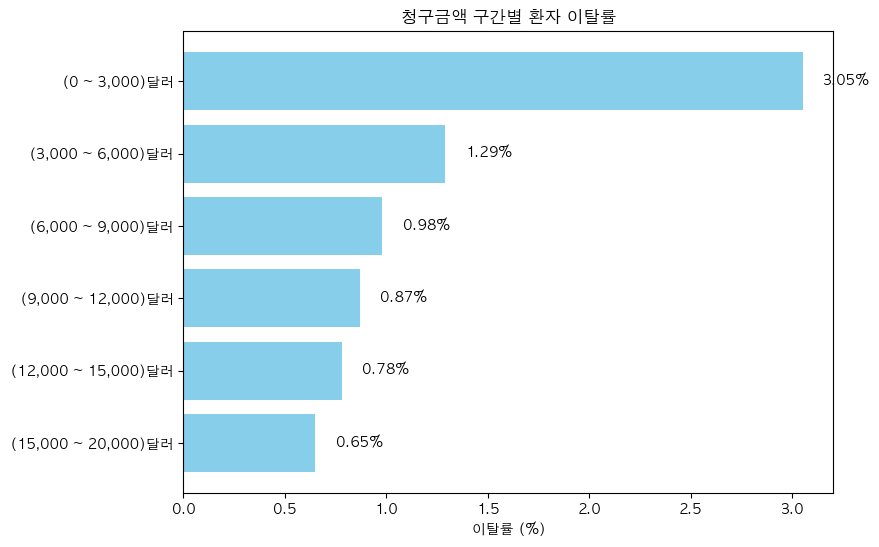

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# macOSÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def plot_evasion_rate_by_range(ranges, rates, title):
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ± Î∞è Ïù¥ÌÉàÎ•† Í∏∞Ï§Ä Ï†ïÎ†¨
    df = pd.DataFrame({'Íµ¨Í∞Ñ': ranges, 'Ïù¥ÌÉàÎ•†': rates})
    df = df.sort_values(by='Ïù¥ÌÉàÎ•†', ascending=False)

    # Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df['Íµ¨Í∞Ñ'], df['Ïù¥ÌÉàÎ•†'], color='skyblue')
    ax.set_xlabel('Ïù¥ÌÉàÎ•† (%)')
    ax.set_title(title)
    ax.invert_yaxis()

    # Í∞í ÌëúÏãú
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}%', va='center')

    # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è ÌëúÏãú
    plt.subplots_adjust(left=0.3, right=0.95)
    plt.show()

# ÏòàÏãú Ìò∏Ï∂ú
ranges = ["(0 ~ 3,000)Îã¨Îü¨", "(3,000 ~ 6,000)Îã¨Îü¨", "(6,000 ~ 9,000)Îã¨Îü¨",
          "(9,000 ~ 12,000)Îã¨Îü¨", "(12,000 ~ 15,000)Îã¨Îü¨", "(15,000 ~ 20,000)Îã¨Îü¨"]
rates = [3.05, 1.29, 0.98, 0.87, 0.78, 0.65]

plot_evasion_rate_by_range(ranges, rates, "Ï≤≠Íµ¨Í∏àÏï° Íµ¨Í∞ÑÎ≥Ñ ÌôòÏûê Ïù¥ÌÉàÎ•†")


ÎãπÏã†Ïùò Îç∞Ïù¥ÌÑ∞Îäî Î≥ëÏõê Ï†ÑÏ≤¥ Ìá¥Ïõê Í∏∞Î°ù Ï§ë Í∑πÌûà ÏùºÎ∂ÄÎßåÏù¥ "ÏûêÏùòÎ°ú ÏùòÎ£åÏßÑ Í∂åÍ≥†Î•º Î¨¥ÏãúÌïòÍ≥† Ìá¥ÏõêÌïú" ÏÇ¨Î°ÄÏûÖÎãàÎã§. Ïù¥Í±¥ ÏùºÎ∞òÏ†ÅÏù∏ Î≥ëÏõê ÏßÑÎ£å Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌùîÌïú ÌòÑÏÉÅÏûÖÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥:

Íµ¨Î∂Ñ	ÏàòÏπò (ÏòàÏãú)
Ï†ÑÏ≤¥ ÏûÖÏõê ÌôòÏûê Ïàò	ÏïΩ 200Îßå Î™Ö
Ïù¥ÌÉà ÌôòÏûê Ïàò	ÏïΩ 5~6Îßå Î™Ö
Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•† (ÌèâÍ∑†)	ÏïΩ 2.5~3% Ï†ïÎèÑ

‚Üí Îî∞ÎùºÏÑú Ïñ¥Îñ§ Í∞ÄÍ≤© Íµ¨Í∞ÑÏóêÏÑúÎì†, ÌèâÍ∑†Ï†ÅÏúºÎ°ú Ïù¥ÌÉàÎ•†Ïù¥ 1~5% ÏÇ¨Ïù¥Î°ú ÎÇòÏò§Îäî Í±¥ Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±ÏÉÅ Îß§Ïö∞ ÏûêÏó∞Ïä§Îü¨Ïö¥ Í≤∞Í≥ºÏûÖÎãàÎã§.



Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÏùòÎØ∏Í∞Ä ÏûàÏäµÎãàÎã§.


‚û° Ï¥ù Ï≤≠Íµ¨ Í∏àÏï°Ïù¥ ÎÇÆÏùÑÏàòÎ°ù Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÍ≥†, Í∏àÏï°Ïù¥ Ïª§ÏßàÏàòÎ°ù Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÎöúÎ†∑Ìï©ÎãàÎã§.

Ìï¥ÏÑù: Ïôú Ï†ÄÎ†¥Ìïú Í∏àÏï°ÏóêÏÑú Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÏùÑÍπå?
ÏùëÍ∏â ÌôòÏûê ÎòêÎäî Îã®Í∏∞ ÏûÖÏõê ÌôòÏûêÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ï¥ù ÎπÑÏö©Ïù¥ ÎÇÆÍ≥†,

Ïù¥Îì§ Ï§ë ÏùºÎ∂ÄÎäî Ï∂©Î∂ÑÌïú ÏÑ§Î™Ö ÏóÜÏù¥ Ìá¥ÏõêÌïòÍ±∞ÎÇò ÏπòÎ£åÎ•º Ï§ëÎã®Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.

Î∞òÎåÄÎ°ú Í≥†ÎπÑÏö© ÏπòÎ£åÎ•º Î∞õÎäî ÌôòÏûêÎäî ÏÉÅÌÉúÍ∞Ä Îçî Ïã¨Í∞ÅÌïòÍ±∞ÎÇò ÏûÖÏõê Í≤∞Ï†ïÏù¥ Îçî Ïã†Ï§ëÌñàÏùÑ ÌôïÎ•†Ïù¥ ÎÜíÏäµÎãàÎã§ ‚Üí Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÎÇÆÏùå


Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•† ÏûêÏ≤¥Í∞Ä 2~3%Î°ú ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïóê, Í∞Å Íµ¨Í∞ÑÏùò Ïù¥ÌÉàÎ•†ÎèÑ ÎãπÏó∞Ìûà ÎÇÆÏäµÎãàÎã§.

ÌïòÏßÄÎßå Ïù¥ÌÉàÎ•†Ïùò ÏÉÅÎåÄÏ†ÅÏù∏ Ï∞®Ïù¥Îäî Î∂ÑÎ™ÖÌï©ÎãàÎã§.

**"Ïù¥ÌÉà ÌôòÏûê = Î≥ëÏõêÏù¥ ÏàòÏùµÏùÑ ÎÜìÏπú ÌôòÏûê"**ÎùºÍ≥† Î≥∏Îã§Î©¥, Î≥ëÏõêÏùÄ ÎÇÆÏùÄ ÎπÑÏö© Íµ¨Í∞Ñ ÌôòÏûêÎì§Ïóê ÎåÄÌï¥ Îçî ÎßéÏùÄ ÏÑ§Î™Ö, ÎßåÏ°±ÎèÑ Í¥ÄÎ¶¨, ÏùëÍ∏âÏã§ Ïù¥ÌÉà Î∞©ÏßÄ Ï°∞ÏπòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

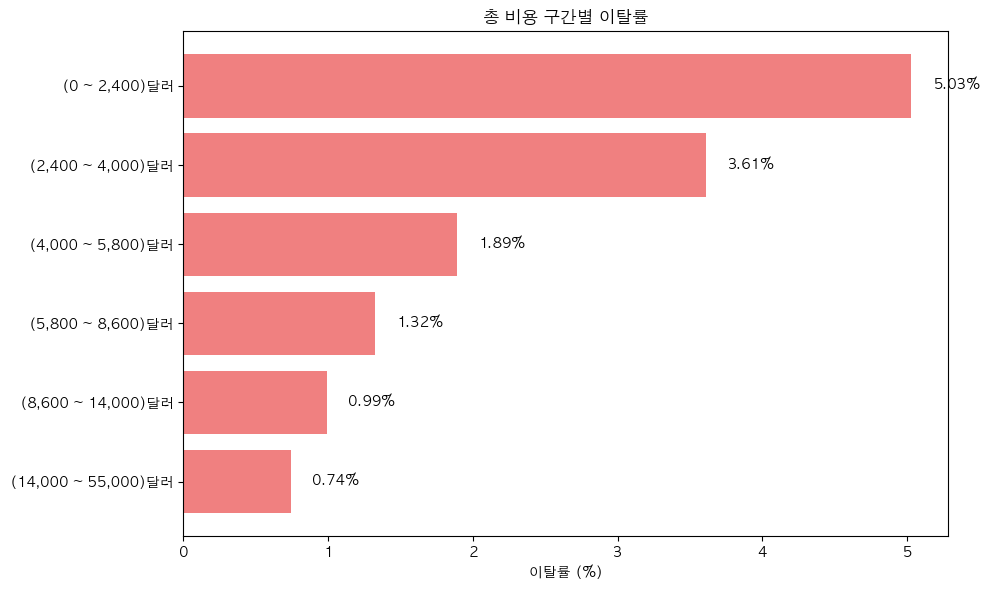

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# macOS ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Total Costs Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† Îç∞Ïù¥ÌÑ∞
evasion_rate_cost = pd.Series({
    '(0 ~ 2,400)Îã¨Îü¨': 5.03,
    '(2,400 ~ 4,000)Îã¨Îü¨': 3.61,
    '(4,000 ~ 5,800)Îã¨Îü¨': 1.89,
    '(5,800 ~ 8,600)Îã¨Îü¨': 1.32,
    '(8,600 ~ 14,000)Îã¨Îü¨': 0.99,
    '(14,000 ~ 55,000)Îã¨Îü¨': 0.74
})

# Ïù¥ÌÉàÎ•† ÎÜíÏùÄ Ïàú Ï†ïÎ†¨
evasion_rate_cost = evasion_rate_cost.sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
bars = plt.barh(evasion_rate_cost.index, evasion_rate_cost.values, color='lightcoral')
plt.xlabel('Ïù¥ÌÉàÎ•† (%)')
plt.title('Ï¥ù ÎπÑÏö© Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•†')
plt.gca().invert_yaxis()

# ÎßâÎåÄ ÏúÑ ÏàòÏπò ÌëúÏãú
for bar in bars:
    plt.text(bar.get_width() + 0.15, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center')

plt.tight_layout()
plt.show()


Î≥ëÏõêÏùò Í¥ÄÏ†ê: Total CostsÏôÄ Ïù¥ÌÉàÎ•†Ïùò Í¥ÄÍ≥Ñ
1Ô∏è‚É£ Total CostsÍ∞Ä ÎÜíÏùÄ ÌôòÏûê ‚Üí Ïù¥ÎØ∏ ÎßéÏùÄ ÏûêÏõêÏù¥ Ìà¨ÏûÖÎê®
Í≤ÄÏÇ¨, ÏãúÏà†, ÏûÖÏõêÍ∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù ÎπÑÏö©Ïù¥ Ïò¨ÎùºÍ∞ê.

Ïù¥Îü∞ ÌôòÏûêÍ∞Ä Í∞ëÏûêÍ∏∞ Ïù¥ÌÉàÌïòÎ©¥,

ÏπòÎ£åÎäî ÎØ∏ÏôÑÎ£å

ÌöåÎ≥µ Î∂àÌôïÏã§

Î≥ëÏõêÏùÄ Ïù¥ÎØ∏ ÏûêÏõêÏùÑ ÏÇ¨Ïö©ÌñàÎäîÎç∞ ÎπÑÏö© ÌöåÏàò Î∂àÌôïÏã§
‚Üí Í∏àÏ†ÑÏ†Å ÏÜêÏã§ + ÏùòÎ£å Î¶¨Ïä§ÌÅ¨

2Ô∏è‚É£ Total CostsÍ∞Ä ÎÇÆÏùÄ ÌôòÏûê ‚Üí Í≤ΩÏ¶ù, Ï¥àÍ∏∞ ÏπòÎ£åÎßå Î∞õÍ≥† Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ‚Üë
Ïòà: ÏùëÍ∏âÏã§ Î∞©Î¨∏ ÌõÑ Î™á ÏãúÍ∞Ñ ÏßÄÎÇòÍ≥† ÎÇòÍ∞ê.

Ïù¥ Í≤ΩÏö∞Îäî ÏûêÏõê ÏÜåÎ™®Í∞Ä Ï†ÅÏúºÎØÄÎ°ú ÏÜêÏã§Ïù¥ Ï†ÅÏßÄÎßå, Ï†ÑÎ∞òÏ†ÅÏù∏ Ïö¥ÏòÅ Ìö®Ïú®Ïóê Î∞©Ìï¥Í∞Ä Îê®.



Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ìï¥ÏÑù
Ïù¥ÌÉà ÌôòÏûê ÎπÑÏú®ÏùÄ Î≥¥ÌÜµ ÎÇÆÏùÄ Total Costs Íµ¨Í∞ÑÏóêÏÑú ÎÜíÍ≤å ÎÇòÏòµÎãàÎã§. Ïù¥Ïú†Îäî:

ÌôòÏûêÍ∞Ä Î≥ëÏõê Ï≤¥Í≥ÑÏóê Ïã†Î¢∞Î•º Í∞ÄÏßÄÏßÄ Î™ªÌï¥ Îπ†Î•¥Í≤å Ïù¥ÌÉàÌïòÎäî Í≤ΩÌñ•

ÎπÑÏö©Ïù¥ ÎÇÆÎã§Îäî Í±¥ Î≥ëÏõêÏùò ÏûêÏõê Ìà¨ÏûÖÏù¥ Ï†ÅÎã§Îäî ÎúªÏù¥ÎØÄÎ°ú, Ìï¥Îãπ ÌôòÏûêÎì§ÏùÄ ÏπòÎ£å ÏãúÏûë Îã®Í≥ÑÏóêÏÑú ÎÇòÍ∞ÄÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùå

Í≥†ÎπÑÏö© ÌôòÏûêÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏπòÎ£åÍ∞Ä ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÏßÑÌñâ Ï§ëÏù¥Îùº Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÏùå



Total CostsÎäî Î≥ëÏõêÏù¥ Í∞êÏàòÌïòÎäî ÏÜêÏã§ ÏúÑÌóòÍ≥º ÏßÅÍ≤∞Îê©ÎãàÎã§.

Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÏùÄ Íµ¨Í∞ÑÏùÑ ÌååÏïÖÌïòÎ©¥ Î≥ëÏõêÏùÄ:

ÏßÑÎ£å Ï¥àÍ∏∞ Îã®Í≥ÑÏóêÏÑú ÌôòÏûê Ïã†Î¢∞ ÌôïÎ≥¥ Ï†ÑÎûµ ÏàòÎ¶Ω

ÏûêÏõê ÎÇ≠ÎπÑÎ•º ÏµúÏÜåÌôîÌïòÍ≥†

Ïû¨Ï†ïÏ†Å ÏÜêÏã§ÏùÑ ÏòàÏ∏°ÌïòÎäî Îç∞ ÎèÑÏõÄÏùÑ Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

Total CostsÎäî Î≥ëÏõêÏù¥ ÌôòÏûê ÏπòÎ£åÏóê Ïã§Ï†úÎ°ú ÏÇ¨Ïö©Ìïú ÎπÑÏö©ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

Î∂ÑÏÑù Í≤∞Í≥º, Î≥ëÏõêÏùò Ï¥ù ÎπÑÏö©Ïù¥ ÎÇÆÏùÑÏàòÎ°ù Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

ÌäπÌûà, Ï¥ù ÎπÑÏö©Ïù¥ 2,400Îã¨Îü¨ Ïù¥ÌïòÏù∏ Í≤ΩÏö∞, Ïù¥ÌÉàÎ•†Ïù¥ **5.03%**Î°ú Í∞ÄÏû• ÎÜíÏïòÏäµÎãàÎã§.

Ïù¥Îäî Í≤ΩÏ¶ù ÌôòÏûêÎÇò Ï°∞Í∏∞ ÏπòÎ£å Ï§ëÎã® ÌôòÏûêÍ∞Ä ÎπÑÏö©ÎèÑ ÎÇÆÍ≥† ÎèôÏãúÏóê Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

Î≥ëÏõê ÏûÖÏû•ÏóêÏÑú ÎπÑÏö©Ïù¥ Ï†ÅÍ≤å Îì†Îã§Í≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ ÏÜêÌï¥Í∞Ä ÎçúÌïú Í≤ÉÏù¥ ÏïÑÎãôÎãàÎã§.
Ïù¥ÌÉàÌïú ÌôòÏûêÏùºÏàòÎ°ù ÏòàÏ∏° Î∂àÍ∞ÄÎä•Ìïú ÏàòÏùµ ÏÜêÏã§Í≥º ÌèâÌåê Ï†ÄÌïòÎ•º Ï¥àÎûòÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

In [41]:
import pandas as pd
import numpy as np

# Ïù¥ÌÉà Ïó¨Î∂Ä ÎùºÎ≤®ÎßÅ
df_cleaned['y'] = np.where(df_cleaned['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# Ï†ÅÏ†àÌïú Íµ¨Í∞Ñ ÏÑ§Ï†ï (Î≥ëÏõê Ïö¥ÏòÅ Í¥ÄÏ†êÏóêÏÑú ÏùºÎ∞òÏ†ÅÏù∏ ÏûÖÏõê Í∏∞Í∞Ñ Í∏∞Ï§Ä)
stay_bins = [0, 2, 4, 6, 8, np.inf]
stay_labels = ['( ~ 1Ïùº)', '(2Ïùº ~ 3Ïùº)', '(4Ïùº ~ 5Ïùº)', '(6Ïùº ~ 7Ïùº)', '(8Ïùº Ïù¥ÏÉÅ)']

# Íµ¨Í∞ÑÌôî
df_cleaned['Length of Stay_bin'] = pd.cut(df_cleaned['Length of Stay'], bins=stay_bins, labels=stay_labels)

# Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
evasion_rate_stay = df_cleaned.groupby('Length of Stay_bin')['y'].mean() * 100
evasion_rate_stay = evasion_rate_stay.round(2)

# Í≤∞Í≥º Ï∂úÎ†•
print("üí§ [Length of Stay] ÏûÖÏõêÏùºÏàò Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† (%)")
print(evasion_rate_stay.sort_values(ascending=False))


üí§ [Length of Stay] ÏûÖÏõêÏùºÏàò Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•† (%)
Length of Stay_bin
( ~ 1Ïùº)      3.75
(2Ïùº ~ 3Ïùº)    1.43
(4Ïùº ~ 5Ïùº)    1.25
(6Ïùº ~ 7Ïùº)    1.00
(8Ïùº Ïù¥ÏÉÅ)      0.90
Name: y, dtype: float64


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_93973/3246108085.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasion_rate_stay = df_cleaned.groupby('Length of Stay_bin')['y'].mean() * 100


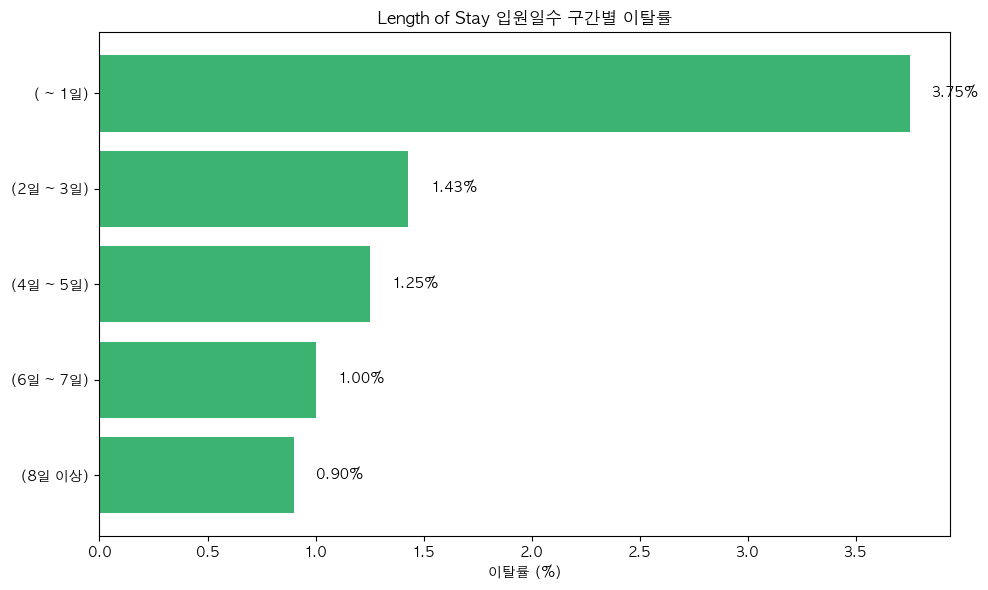

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# macOS ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rc('font', family='AppleGothic')  # macOSÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False

# Ïù¥ÌÉàÎ•† Îç∞Ïù¥ÌÑ∞
evasion_rate_stay = pd.Series({
    '( ~ 1Ïùº)': 3.75,
    '(2Ïùº ~ 3Ïùº)': 1.43,
    '(4Ïùº ~ 5Ïùº)': 1.25,
    '(6Ïùº ~ 7Ïùº)': 1.00,
    '(8Ïùº Ïù¥ÏÉÅ)': 0.9
})

# Ï†ïÎ†¨
evasion_rate_stay = evasion_rate_stay.sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
bars = plt.barh(evasion_rate_stay.index, evasion_rate_stay.values, color='mediumseagreen')
plt.xlabel('Ïù¥ÌÉàÎ•† (%)')
plt.title('Length of Stay ÏûÖÏõêÏùºÏàò Íµ¨Í∞ÑÎ≥Ñ Ïù¥ÌÉàÎ•†')
plt.gca().invert_yaxis()

# Í∞í ÌëúÏãú
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center')

plt.tight_layout()
plt.show()


1. ÏûÖÏõê Ï≤´ 1Ïùº Ïù¥ÎÇ¥ ÌôòÏûê Ïù¥ÌÉàÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÎã§ (3.71%)

ÏπòÎ£åÍ∞Ä ÏãúÏûëÎêòÍ∏∞ Ï†Ñ, ÌòπÏùÄ ÏùëÍ∏âÏã§ Î∞©Î¨∏ ÌõÑ Í∞ÑÎã®Ìïú Í≤ÄÏÇ¨Îßå Î∞õÏùÄ ÌôòÏûêÎì§Ïù¥ ÏûêÏùòÎ°ú Ìá¥ÏõêÌïòÎäî Í≤ΩÏö∞Ïùº Ïàò ÏûàÏäµÎãàÎã§.

Î∂àÎßåÏ°±, ÎπÑÏö© Î∂ÄÎã¥, ÎåÄÍ∏∞ ÏãúÍ∞Ñ, ÎòêÎäî ÏÉÅÌÉú Ìò∏Ï†Ñ Îì±Ïù¥ ÏõêÏù∏Ïùº Ïàò ÏûàÏäµÎãàÎã§.

2. ÏûÖÏõêÏùºÏàòÍ∞Ä ÎäòÏñ¥ÎÇ†ÏàòÎ°ù Ïù¥ÌÉàÎ•†ÏùÄ Ï†êÏßÑÏ†ÅÏúºÎ°ú ÎÇÆÏïÑÏßÑÎã§

ÏûÖÏõê Í∏∞Í∞ÑÏù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÌôòÏûêÎäî ÏπòÎ£å Í≥ÑÌöçÏóê Îçî ÍπäÏù¥ Îì§Ïñ¥Í∞ÄÍ≤å ÎêòÍ≥†, ÏùòÏÇ¨Ïùò Í∂åÍ≥†Î•º Îî∞Î•¥Îäî Í≤ΩÌñ•Ïù¥ ÎÜíÏäµÎãàÎã§.

ÌäπÌûà 7Ïùº Ïù¥ÏÉÅ ÏûÖÏõêÌïú ÌôòÏûêÏùò Ïù¥ÌÉàÎ•†ÏùÄ 0.78%Î°ú Îß§Ïö∞ ÎÇÆÏäµÎãàÎã§.

3. Ïö¥ÏòÅÏ†Å Ìï¥ÏÑù

Î≥ëÏõê ÏûÖÏû•ÏóêÏÑúÎäî ÏûÖÏõê Ï¥àÍ∏∞Ïóê Î∞úÏÉùÌïòÎäî Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.

ÏûÖÏõê Ï≤´ÎÇ† ÌôòÏûê Í≤ΩÌóò(ÏùëÍ∏âÏã§ ÎåÄÍ∏∞, ÏÑ§Î™Ö Î∂ÄÏ°±, Ï¥àÍ∏∞ ÏßÑÎ£å ÎØ∏Ìù° Îì±)ÏùÑ Í∞úÏÑ†Ìï† Í≤ΩÏö∞ Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†ÏùÑ ÌÅ¨Í≤å ÎÇÆÏ∂ú Ïàò ÏûàÏäµÎãàÎã§.



In [11]:
### ÏÑ†Ï†ïÎêú Î™®Îç∏ ÏµúÏ†ÅÌôî Î∞è ÌèâÍ∞Ä 
from utils.get_best_model import get_best_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (precision_recall_curve, roc_curve,
                    average_precision_score, roc_auc_score,
                    PrecisionRecallDisplay, RocCurveDisplay)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ÌèâÍ∞ÄÏßÄÌëú Ï¥àÍ∏∞Ìôî 
results = []

# Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ°ú Î≥ÄÌôò 
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'].values == 'Left Against Medical Advice', 1, 0)

# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ 10%, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 2%
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.01, test_size=0.004, random_state=42, stratify=y)


# -------------------------------
## Logistic Regression Î™®Îç∏ ÏµúÏ†ÅÌôî
# -------------------------------

from sklearn.linear_model import LogisticRegression

# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
logistic_model = get_best_model('LogisticRegression', \
                                                LogisticRegression(), params, preprocessor2, X_train, y_train)


# -------------------------------
## PR Curve Î∞è ROC Curve ÏãúÍ∞ÅÌôî
# -------------------------------

# Î™®Îç∏ ÏòàÏ∏°
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
prec_logistic, rec_logistic, thresholds = precision_recall_curve(y_test, y_pred_proba_logistic)
ap_logistic = average_precision_score(y_test, y_pred_proba_logistic)

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

# -------------------------------
## ÏµúÏ†Å Threshold Î•º Ïù¥Ïö©Ìïú ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
# -------------------------------

# Best Threshold Ï∞æÍ∏∞ 
f1_scores = [f1_score(y_test, y_pred_proba_logistic >= t, zero_division=0) for t in thresholds]
best_threshold_logistic = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold based on F1 Score: {best_threshold_logistic:.2f}")

# ÏµúÏ†Å thresholdÎ•º ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_logistic = (y_pred_proba_logistic >= best_threshold_logistic).astype(int)

# ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
logistic_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic, zero_division=0),
    'Recall': recall_score(y_test, y_pred_logistic, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_logistic, zero_division=0)
}

# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({'Model' : 'LogisticRegression', **logistic_scores})



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification

best parameter: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 1}
best score: 0.4468097919634711
Best Threshold based on F1 Score: 0.48


In [13]:
# ÌäπÏÑ± Ïù¥Î¶Ñ Ï∂îÏ∂ú (OneHot Ïù∏ÏΩîÎî©Îêú feature Ïù¥Î¶Ñ Ìè¨Ìï®)
feature_names = logistic_model.named_steps['preprocessor'].transformers_[0][1]\
                    .named_steps['onehotencoder'].get_feature_names_out(cate_columns)
num_features = num_columns
all_features = np.concatenate([feature_names, num_features])

# Í≥ÑÏàò Í∞ÄÏ†∏Ïò§Í∏∞
coef = logistic_model.named_steps['model'].coef_.flatten()

# DataFrameÏúºÎ°ú Ï†ïÎ¶¨
FI_lg = pd.DataFrame({'Feature': all_features, 'Coefficient': coef})
FI_lg = FI_lg.sort_values(by='Coefficient', key=np.abs, ascending=False)

# ÏÉÅÏúÑ nÍ∞ú Ï∂úÎ†•
print(FI_lg.head(10))


                                                Feature  Coefficient
1201  APR DRG Description_DRUG & ALCOHOL ABUSE OR DE...     3.626107
1139                                   APR DRG Code_770     3.626107
415                                   Age Group_0 to 17    -1.862985
1403          APR Medical Surgical Description_Surgical    -1.720872
435                                 Discharge Year_2010    -1.315899
1141                                   APR DRG Code_773    -1.206672
1266      APR DRG Description_OPIOID ABUSE & DEPENDENCE    -1.206672
419                               Age Group_70 or Older    -1.192925
1143                                   APR DRG Code_775    -1.072811
1163     APR DRG Description_ALCOHOL ABUSE & DEPENDENCE    -1.072811


In [ ]:
# ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò
top_10 = FI_lg.head(10)

# all_features Î∞∞Ïó¥ÏóêÏÑú Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
top_10['Index_in_all_features'] = top_10['Feature'].apply(lambda f: np.where(all_features == f)[0][0])

# Ïù∏Îç±Ïä§ + Í∞í Ï∂úÎ†•
for _, row in top_10.iterrows():
    print(f"Feature: {row['Feature']}\n‚Üí Index: {row['Index_in_all_features']}, Coefficient: {row['Coefficient']:.4f}\n")


Feature: APR DRG Description_DRUG & ALCOHOL ABUSE OR DEPENDENCE, LEFT AGAINST MEDICAL ADVICE
‚Üí Index: 1201, Coefficient: 3.6261

Feature: APR DRG Code_770
‚Üí Index: 1139, Coefficient: 3.6261

Feature: Age Group_0 to 17
‚Üí Index: 415, Coefficient: -1.8630

Feature: APR Medical Surgical Description_Surgical
‚Üí Index: 1403, Coefficient: -1.7209

Feature: Discharge Year_2010
‚Üí Index: 435, Coefficient: -1.3159

Feature: APR DRG Code_773
‚Üí Index: 1141, Coefficient: -1.2067

Feature: APR DRG Description_OPIOID ABUSE & DEPENDENCE
‚Üí Index: 1266, Coefficient: -1.2067

Feature: Age Group_70 or Older
‚Üí Index: 419, Coefficient: -1.1929

Feature: APR DRG Code_775
‚Üí Index: 1143, Coefficient: -1.0728

Feature: APR DRG Description_ALCOHOL ABUSE & DEPENDENCE
‚Üí Index: 1163, Coefficient: -1.0728



/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_80169/2744038399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Index_in_all_features'] = top_10['Feature'].apply(lambda f: np.where(all_features == f)[0][0])


In [11]:
# -------------------------------
## Random Forest Î™®Îç∏ ÏµúÏ†ÅÌôî
# -------------------------------

from sklearn.ensemble import RandomForestClassifier
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
rfc_model = get_best_model('RandomForestClassifier', \
                                                RandomForestClassifier(), params, preprocessor, X_train, y_train)


# -------------------------------
## PR Curve Î∞è ROC Curve ÏãúÍ∞ÅÌôî
# -------------------------------

# Î™®Îç∏ ÏòàÏ∏°
y_pred_proba_rfc = rfc_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
prec_rfc, rec_rfc, thresholds = precision_recall_curve(y_test, y_pred_proba_rfc)
ap_rfc = average_precision_score(y_test, y_pred_proba_rfc)

# ROC Curve
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_proba_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_proba_rfc)

# -------------------------------
## ÏµúÏ†Å Threshold Î•º Ïù¥Ïö©Ìïú ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
# -------------------------------

# Best Threshold Ï∞æÍ∏∞ 
f1_scores = [f1_score(y_test, y_pred_proba_rfc >= t, zero_division=0) for t in thresholds]
best_threshold_rfc = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold based on F1 Score: {best_threshold_rfc:.2f}")

# ÏµúÏ†Å thresholdÎ•º ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_rfc = (y_pred_proba_rfc >= best_threshold_rfc).astype(int)

# ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
rfc_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_rfc),
    'Precision': precision_score(y_test, y_pred_rfc, zero_division=0),
    'Recall': recall_score(y_test, y_pred_rfc, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_rfc, zero_division=0)
}

# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({'Model' : 'RandomForestClassifier', **rfc_scores})


Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameter: {'model__n_estimators': 50, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': None}
best score: 0.43798274395782716
Best Threshold based on F1 Score: 0.28


In [19]:
# 1. Ï†ÑÏ≤òÎ¶¨Îêú feature Ïù¥Î¶ÑÎì§ Ï∂îÏ∂ú (Î≤îÏ£ºÌòï OneHot Ïù∏ÏΩîÎî© Ìè¨Ìï®)
feature_names = rfc_model.named_steps['preprocessor'].transformers_[0][1]\
                    .named_steps['ordinalencoder'].get_feature_names_out(cate_columns)
num_features = num_columns
all_features = np.concatenate([feature_names, num_features])

# 2. ÌäπÏÑ± Ï§ëÏöîÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞
importances = rfc_model.named_steps['model'].feature_importances_

# 3. DataFrameÏúºÎ°ú Ï†ïÎ¶¨ Î∞è Ï†ïÎ†¨
FI_rf = pd.DataFrame({'Feature': all_features, 'Importance': importances})
FI_rf = FI_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 4. ÏÉÅÏúÑ 10Í∞ú Ïù∏Îç±Ïä§ Î∞è Í∞í ÌôïÏù∏
FI_rf['Index_in_all_features'] = FI_rf['Feature'].apply(lambda f: np.where(all_features == f)[0][0])
print(FI_rf.head(10))


                     Feature  Importance  Index_in_all_features
0               APR DRG Code    0.186951                     14
1        APR DRG Description    0.139447                     15
2                Total Costs    0.070296                     26
3              Total Charges    0.069427                     25
4        APR MDC Description    0.062252                     17
5         CCS Diagnosis Code    0.046232                     10
6  CCS Procedure Description    0.046027                     13
7             Length of Stay    0.044471                     27
8                Facility ID    0.042853                      2
9              Facility Name    0.042374                      3


In [20]:
# -------------------------------
## XGBoost Î™®Îç∏ ÏµúÏ†ÅÌôî
# -------------------------------

from xgboost import XGBClassifier
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 1.0]
}
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
xgb_model = get_best_model('XGBClassifier',\
                                                XGBClassifier(), params, preprocessor, X_train, y_train)


# -------------------------------
## PR Curve Î∞è ROC Curve ÏãúÍ∞ÅÌôî
# -------------------------------

# Î™®Îç∏ ÏòàÏ∏°
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
prec_xgb, rec_xgb, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)
ap_xgb = average_precision_score(y_test, y_pred_proba_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# -------------------------------
## ÏµúÏ†Å Threshold Î•º Ïù¥Ïö©Ìïú ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
# -------------------------------

# Best Threshold Ï∞æÍ∏∞ 
f1_scores = [f1_score(y_test, y_pred_proba_xgb >= t, zero_division=0) for t in thresholds]
best_threshold_xgb = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold based on F1 Score: {best_threshold_xgb:.2f}")

# ÏµúÏ†Å thresholdÎ•º ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_xgb = (y_pred_proba_xgb >= best_threshold_xgb).astype(int)

# ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
xgb_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb, zero_division=0),
    'Recall': recall_score(y_test, y_pred_xgb, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_xgb, zero_division=0)
}

# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({'Model' : 'XGBClassifier', **xgb_scores})


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinse

best parameter: {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.5}
best score: 0.45512908673768154
Best Threshold based on F1 Score: 0.57


Feature name count: 28, Importance count: 28


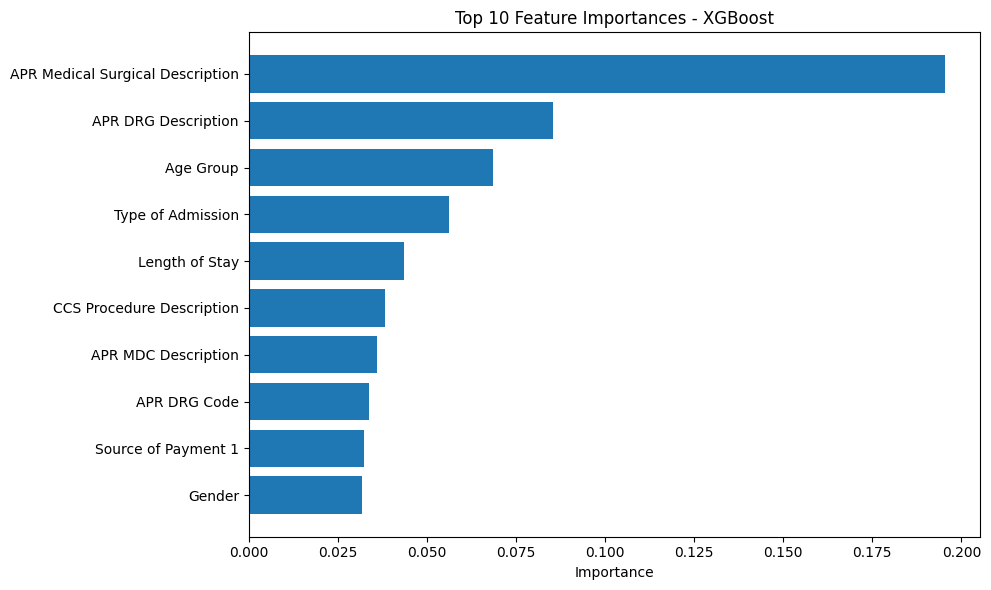

                             Feature  Importance
21  APR Medical Surgical Description    0.195329
15               APR DRG Description    0.085294
4                          Age Group    0.068558
8                  Type of Admission    0.056307
27                    Length of Stay    0.043607
13         CCS Procedure Description    0.038158
17               APR MDC Description    0.035863
14                      APR DRG Code    0.033866
22               Source of Payment 1    0.032436
5                             Gender    0.031770


In [23]:
# Ï†ÑÏ≤¥ feature Ïù¥Î¶Ñ Ï∂îÏ∂ú (OrdinalEncoded + ÏàòÏπòÌòï)
cat_features = xgb_model.named_steps['preprocessor'].transformers_[0][1]\
    .named_steps['ordinalencoder'].get_feature_names_out(cate_columns)
all_features = np.concatenate([cat_features, num_columns])

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = xgb_model.named_steps['model'].feature_importances_

# Í∏∏Ïù¥ ÌôïÏù∏ (ÎîîÎ≤ÑÍπÖÏö©)
print(f"Feature name count: {len(all_features)}, Importance count: {len(importances)}")

# DataFrame ÏÉùÏÑ±
FI_xgb = pd.DataFrame({'Feature': all_features, 'Importance': importances})
FI_xgb = FI_xgb.sort_values(by='Importance', ascending=False).head(10)

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(FI_xgb['Feature'], FI_xgb['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÌôïÏù∏
print(FI_xgb)


In [26]:
# -------------------------------
## GradientBoosting Î™®Îç∏ ÏµúÏ†ÅÌôî
# -------------------------------

from sklearn.ensemble import GradientBoostingClassifier
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 1.0],
    'model__min_samples_split': [2, 5, 10]
}
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
gb_model = get_best_model('GradientBoosting',\
                                                GradientBoostingClassifier(), params, preprocessor, X_train, y_train)


# -------------------------------
## PR Curve Î∞è ROC Curve ÏãúÍ∞ÅÌôî
# -------------------------------

# Î™®Îç∏ ÏòàÏ∏°
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
prec_gb, rec_gb, thresholds = precision_recall_curve(y_test, y_pred_proba_gb)
ap_gb = average_precision_score(y_test, y_pred_proba_gb)

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

# -------------------------------
## ÏµúÏ†Å Threshold Î•º Ïù¥Ïö©Ìïú ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
# -------------------------------

# Best Threshold Ï∞æÍ∏∞ 
f1_scores = [f1_score(y_test, y_pred_proba_gb >= t, zero_division=0) for t in thresholds]
best_threshold_gb = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold based on F1 Score: {best_threshold_gb:.2f}")

# ÏµúÏ†Å thresholdÎ•º ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_gb = (y_pred_proba_gb >= best_threshold_gb).astype(int)

# ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
gb_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb, zero_division=0),
    'Recall': recall_score(y_test, y_pred_gb, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_gb, zero_division=0)
}

# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({'Model' : 'GradientBoosting', **gb_scores})


Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameter: {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': 3, 'model__learning_rate': 0.1}
best score: 0.4554812250960764
Best Threshold based on F1 Score: 0.72


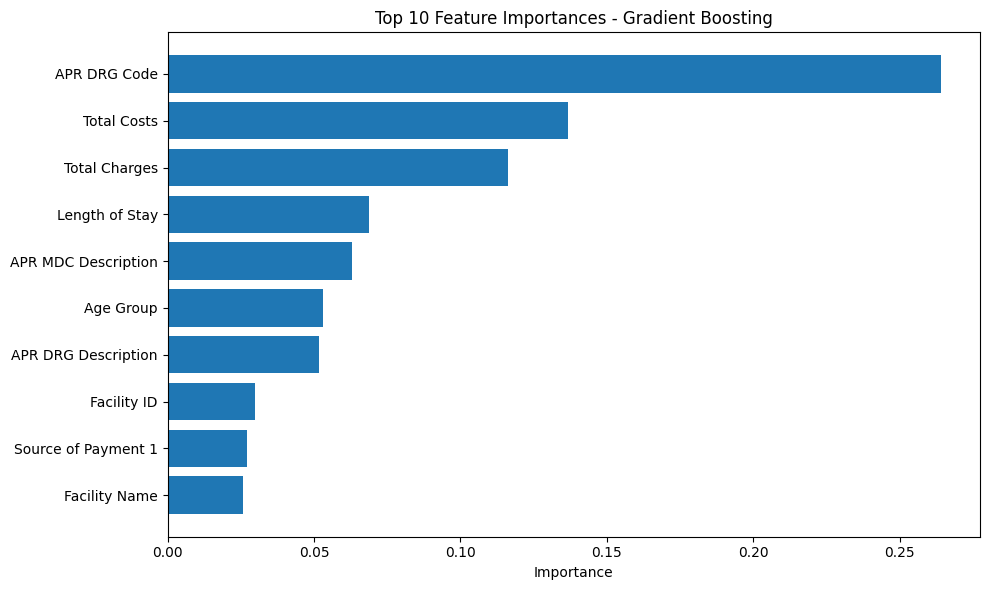

                Feature  Importance
14         APR DRG Code    0.264175
26          Total Costs    0.136781
25        Total Charges    0.116248
27       Length of Stay    0.068644
17  APR MDC Description    0.062834
4             Age Group    0.053216
15  APR DRG Description    0.051537
2           Facility ID    0.029698
22  Source of Payment 1    0.027278
3         Facility Name    0.025855


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Ï†ÑÏ≤òÎ¶¨Îêú feature Ïù¥Î¶Ñ Ï∂îÏ∂ú
cat_features = gb_model.named_steps['preprocessor'].transformers_[0][1]\
    .named_steps['ordinalencoder'].get_feature_names_out(cate_columns)
all_features = np.concatenate([cat_features, num_columns])

# 2. feature importance Ï∂îÏ∂ú
importances = gb_model.named_steps['model'].feature_importances_

# 3. DataFrameÏúºÎ°ú Ï†ïÎ¶¨ ÌõÑ ÏÉÅÏúÑ 10Í∞ú Ï∂îÏ∂ú
FI_gb = pd.DataFrame({'Feature': all_features, 'Importance': importances})
FI_gb = FI_gb.sort_values(by='Importance', ascending=False).head(10)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(FI_gb['Feature'], FI_gb['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(FI_gb)


In [28]:
# APR DRG Code Ïª¨ÎüºÏóêÏÑú ÏÉÅÏúÑ 10Í∞úÏùò Í≥†Ïú†Í∞íÍ≥º Í∑∏ Í∞úÏàòÎ•º Ï∂úÎ†•
top_10_apr_drg = df['APR DRG Code'].value_counts().head(10)
print(top_10_apr_drg)


APR DRG Code
640       210859
560       152307
Others    133723
540        81315
194        55247
139        50257
140        47464
720        46841
383        41739
203        39696
Name: count, dtype: int64


In [39]:
# ÏÉÅÏúÑ 10Í∞úÏùò APR DRG Code + Description Ï°∞Ìï© ÏßëÍ≥Ñ
top_10_apr_drg_df = df.groupby(['APR DRG Code', 'APR DRG Description']) \
                      .size() \
                      .sort_values(ascending=False) \
                      .head(10) \
                      .reset_index(name='Count')

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(
    top_10_apr_drg_df['APR DRG Code'].astype(str) + " - " + top_10_apr_drg_df['APR DRG Description'],
    top_10_apr_drg_df['Count']
)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Top 10 APR DRG Codes by Frequency")
plt.tight_layout()
plt.show()


KeyError: 'APR DRG Code'

In [31]:
# dfÏóê 'y' Ïª¨ÎüºÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï (Ïù¥ÌÉà Ïó¨Î∂Ä: 1 ÎòêÎäî 0)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# Í∞Å DRG ÏΩîÎìúÎ≥Ñ Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
drg_evasion = df.groupby('APR DRG Code')['y'].mean().sort_values(ascending=False)
print(drg_evasion.head(10))


APR DRG Code
770    1.000000
894    0.139463
816    0.134312
892    0.117631
662    0.107234
890    0.085417
280    0.063636
282    0.061515
566    0.060130
251    0.059200
Name: y, dtype: float64


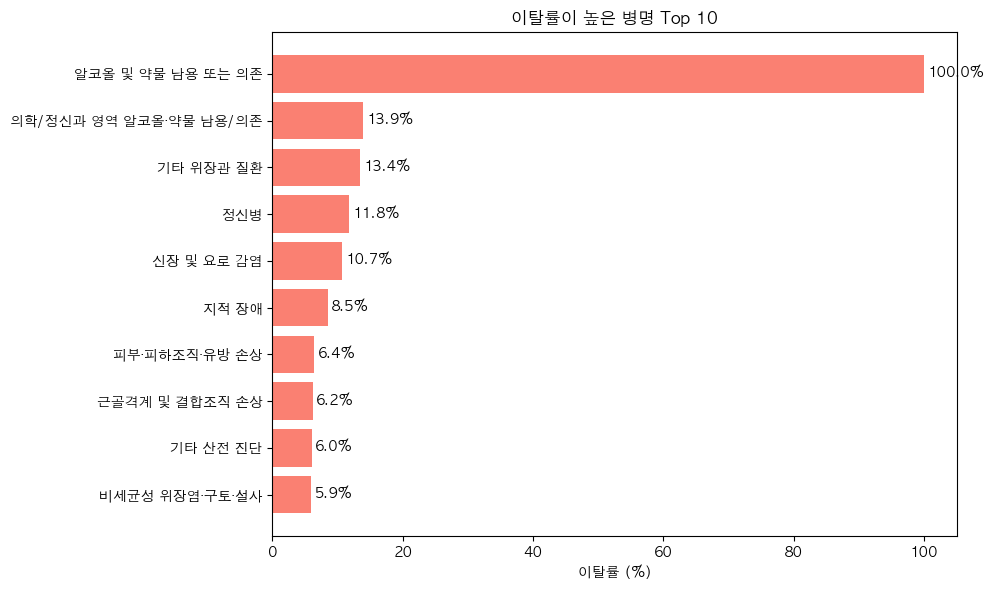

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ‚úÖ MacÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: AppleGothic)
if platform.system() == 'Darwin':  # Mac OS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # ÏúàÎèÑÏö∞Ïùº Í≤ΩÏö∞ ÏòàÏãú
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Î¶¨ÎàÖÏä§ Îì±
    plt.rcParams['font.family'] = 'NanumGothic'

# ‚úÖ ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
data = {
    'Î≥ëÎ™Ö ÏΩîÎìú': [770, 894, 816, 892, 662, 890, 280, 282, 566, 251],
    'Î≥ëÎ™Ö (ÌïúÍ∏Ä Î≤àÏó≠)': [
        'ÏïåÏΩîÏò¨ Î∞è ÏïΩÎ¨º ÎÇ®Ïö© ÎòêÎäî ÏùòÏ°¥',
        'ÏùòÌïô/Ï†ïÏã†Í≥º ÏòÅÏó≠ ÏïåÏΩîÏò¨¬∑ÏïΩÎ¨º ÎÇ®Ïö©/ÏùòÏ°¥',
        'Í∏∞ÌÉÄ ÏúÑÏû•Í¥Ä ÏßàÌôò',
        'Ï†ïÏã†Î≥ë',
        'Ïã†Ïû• Î∞è ÏöîÎ°ú Í∞êÏóº',
        'ÏßÄÏ†Å Ïû•Ïï†',
        'ÌîºÎ∂Ä¬∑ÌîºÌïòÏ°∞ÏßÅ¬∑Ïú†Î∞© ÏÜêÏÉÅ',
        'Í∑ºÍ≥®Í≤©Í≥Ñ Î∞è Í≤∞Ìï©Ï°∞ÏßÅ ÏÜêÏÉÅ',
        'Í∏∞ÌÉÄ ÏÇ∞Ï†Ñ ÏßÑÎã®',
        'ÎπÑÏÑ∏Í∑†ÏÑ± ÏúÑÏû•Ïóº¬∑Íµ¨ÌÜ†¬∑ÏÑ§ÏÇ¨'
    ],
    'Ïù¥ÌÉàÎ•†': [100.0, 13.9, 13.4, 11.8, 10.7, 8.5, 6.4, 6.2, 6.0, 5.9]
}

df = pd.DataFrame(data)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Î≥ëÎ™Ö (ÌïúÍ∏Ä Î≤àÏó≠)'], df['Ïù¥ÌÉàÎ•†'], color='salmon')
plt.xlabel('Ïù¥ÌÉàÎ•† (%)')
plt.title('Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÏùÄ Î≥ëÎ™Ö Top 10')
plt.gca().invert_yaxis()

# Í∞Å ÎßâÎåÄÏóê ÏàòÏπò ÌëúÏãú
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center')

plt.tight_layout()
plt.show()


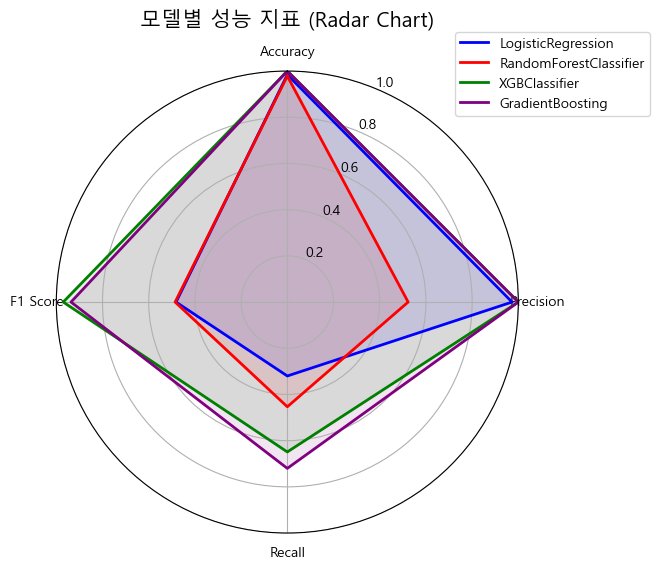

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - ÌèâÍ∞ÄÏßÄÌëú(Radar Chart)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
import os

img_dir = 'images'
os.makedirs(img_dir, exist_ok=True)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
mpl.rc('font', family='Malgun Gothic')

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
mpl.rcParams['axes.unicode_minus'] = False

# Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

# Î†àÏù¥ÎçîÏ∞®Ìä∏ ÏÑ§Ï†ï
labels = results_df.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Ï≤´ Ìè¨Ïù∏Ìä∏Î°ú ÎêòÎèåÏïÑÍ∞ÄÍ∏∞

# Ï∞®Ìä∏ Ï¥àÍ∏∞Ìôî
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÏßÄÌëú (Radar Chart)", size=15, y=1.08)

# Í∞Å Î™®Îç∏Î≥ÑÎ°ú plot
colors = ['blue', 'red', 'green', 'purple']
for i, (model_name, row) in enumerate(results_df.iterrows()):
    values = row.tolist()  
    if i in [2, 3]:
        values = [min(1, v * 2) for v in values]
    
    values += values[:1]
    ax.plot(angles, values, label=model_name, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.1)

# Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Î∞òÏßÄÎ¶Ñ Í∞í Í≥†Ï†ï
ax.set_ylim(0, 1)

# Î≤îÎ°Ä
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.savefig(os.path.join(img_dir, 'radar_chart.png'), dpi=300, bbox_inches='tight')
plt.show()

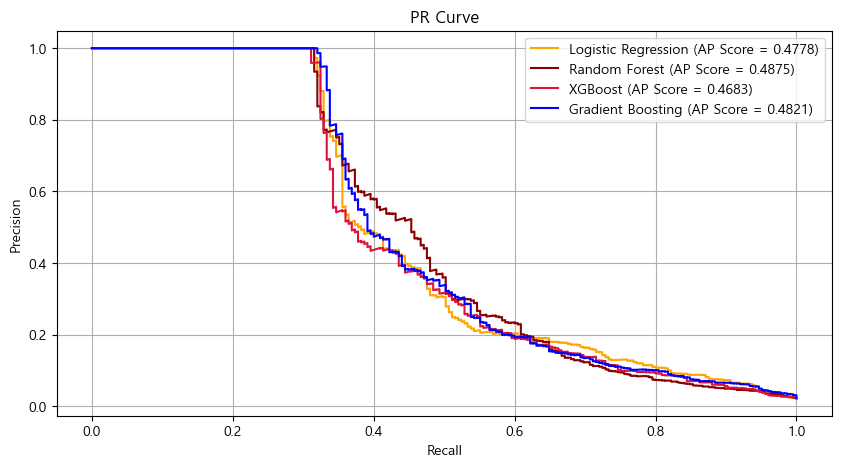

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - PR Curve

plt.figure(figsize=(10, 5))
plt.plot(rec_logistic, prec_logistic, label=f'Logistic Regression (AP Score = {ap_logistic:.4f})', color='orange')
plt.plot(rec_rfc, prec_rfc, label=f'Random Forest (AP Score = {ap_rfc:.4f})', color='darkred')
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP Score = {ap_xgb:.4f})', color='crimson')
plt.plot(rec_gb, prec_gb, label=f'Gradient Boosting (AP Score = {ap_gb:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_dir, 'PR_Curve.png'), dpi=300, bbox_inches='tight')
plt.show()


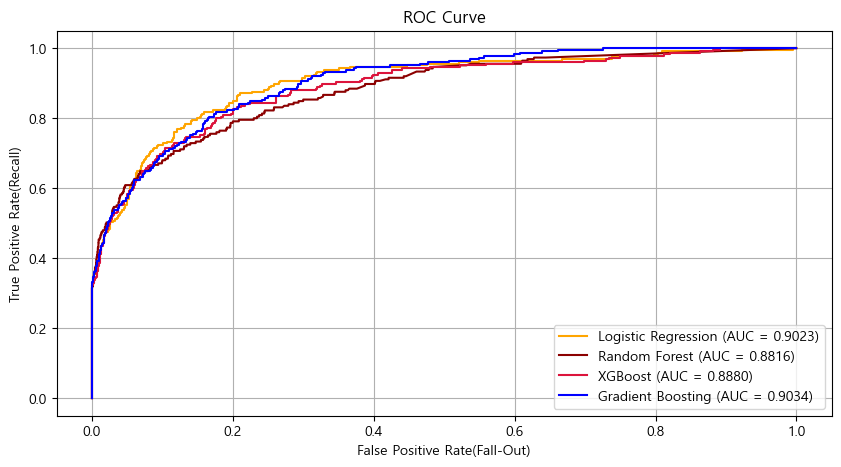

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - ROC Curve

plt.figure(figsize=(10, 5))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})', color='orange')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.4f})', color='darkred')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='crimson')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})', color='blue')
plt.xlabel('False Positive Rate(Fall-Out)')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(img_dir, 'ROC_Curve.png'), dpi=300, bbox_inches='tight')
plt.show()


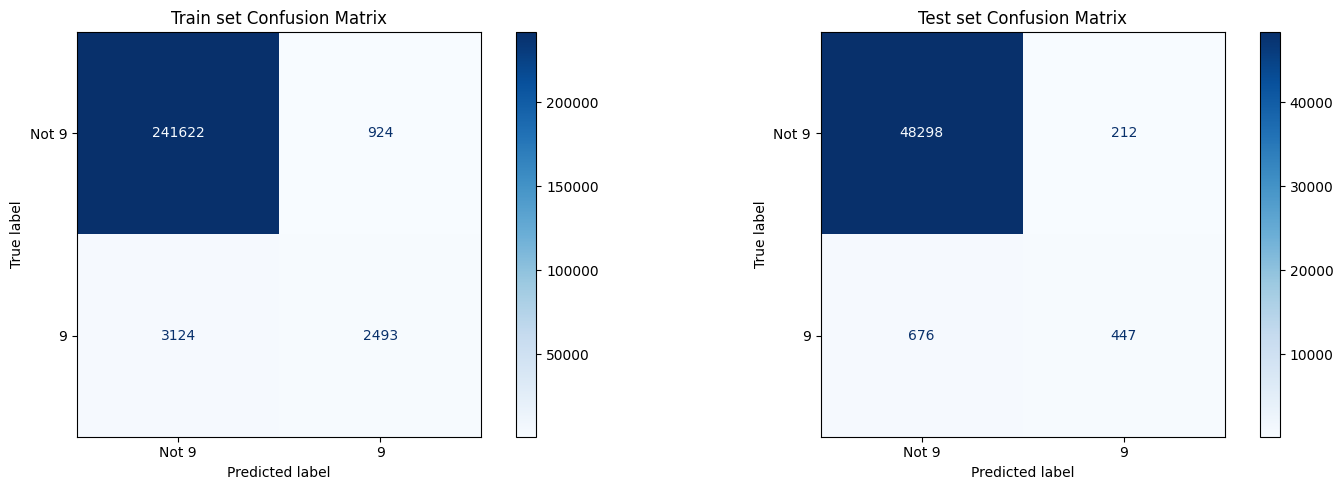

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - ÌòºÎèôÌñâÎ†¨ - ÏµúÏ¢Ö Î™®Îç∏(xgboost)Îßå
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Î™®Îç∏ ÏòàÏ∏°
y_pred_proba_train = xgb_model.predict_proba(X_train)[:, 1]
y_pred_proba_test = xgb_model.predict_proba(X_test)[:, 1]
y_pred_train = (y_pred_proba_train >= best_threshold_xgb).astype(int)
y_pred_test = (y_pred_proba_test >= best_threshold_xgb).astype(int)

# ÌòºÎèôÌñâÎ†¨ ÏÉùÏÑ±
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

disp_train = ConfusionMatrixDisplay(
    cm_train, #confusion matrix
    display_labels=['Not 9', '9']       # [ÏùåÏÑ±Î†àÏù¥Î∏î, ÏñëÏÑ±Î†àÏù¥Î∏î]
)
disp_train.plot(cmap='Blues', ax=ax1)    # Ï∂úÎ†•

disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
    display_labels=['Not 9', '9']) 

disp_test.plot(cmap='Blues', ax=ax2)

ax1.set_title("Train set Confusion Matrix")
ax2.set_title("Test set Confusion Matrix")
plt.tight_layout()
plt.savefig('Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()
